In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from collections import deque
from matplotlib import cm

In [2]:
class GridEnv:
    def __init__(self, m=3, n=4, gamma=0.9):
        self.m = m
        self.n = n
        self.grid = None
        self.wall = (m // 2, n // 2 - 1)
        self.goal = (0, n - 1)
        self.pit = (1, n - 1)
        self.gamma = gamma
        self.reset()

    def reset(self):
        self.grid = [[0] * self.n for _ in range(self.m)]
        self.grid = np.array(self.grid).astype(np.float)
        self.grid[self.goal[0], self.goal[1]] = 1
        self.grid[1, -1] = -1

    def render(self):
        cmap = colors.ListedColormap(["red", "white", "green"])

        fig, ax = plt.subplots()
        plt.gcf().canvas.mpl_connect(
            "key_release_event",
            lambda event: [exit(0) if event.key == "escape" else None],
        )
        ax.imshow(self.grid, cmap=cm.get_cmap('YlGn'))
        ax.grid(True, which="major", axis="both")
        ax.set_xticks(np.arange(-0.5, self.n, 1))
        ax.set_yticks(np.arange(-0.5, self.m, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        x_start = -0.5
        x_end = self.n
        y_start = -0.5
        y_end = self.m

        jump_x = (x_end - x_start) / (2.0 * self.n)
        jump_y = (y_end - y_start) / (2.0 * self.m)
        x_positions = np.linspace(start=x_start, stop=x_end, num=self.n, endpoint=False)
        y_positions = np.linspace(start=y_start, stop=y_end, num=self.m, endpoint=False)

        for y_index, y in enumerate(y_positions):
            for x_index, x in enumerate(x_positions):
                if self.wall == (x_index, y_index):
                    continue
                label = self.grid[y_index, x_index]
                text_x = x + jump_x * 0.5
                text_y = y + jump_y * 0.5
                ax.text(text_x, text_y, label, color="black", ha="center", va="center")

        plt.pause(0.1)
        _ = plt.show()

    def value_iteration(self, iters=10, render=False):
        m = self.m
        n = self.n

        for _ in range(iters):
            queue = deque()
            queue.append(self.goal)
            visited = []
            while queue:
                item = queue.popleft()
                visited.append(item)
                if item == self.goal:
                    if item[0] > 0 and (item[0] - 1, item[1]) != self.pit:
                        queue.append((item[0] - 1, item[1]))
                    if item[1] < n - 1 and (item[0], item[1] + 1) != self.pit:
                        queue.append((item[0], item[1] + 1))
                    if item[0] < m - 1 and (item[0] + 1, item[1]) != self.pit:
                        queue.append((item[0] + 1, item[1]))
                    if item[1] > 0 and (item[0], item[1] - 1) != self.pit:
                        queue.append((item[0], item[1] - 1))
                    continue

                q_values = []

                ## Move up
                new_pos = (max(item[0] - 1, 0), item[1])
                if new_pos == self.wall:
                    new_pos = (item[0], item[1])
                q = 0.8 * self.gamma * self.grid[new_pos[0], new_pos[1]]
                if (item[0], max(item[1] - 1, 0)) != self.wall:
                    q += 0.1 * self.gamma * self.grid[item[0], max(item[1] - 1, 0)]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                if (item[0], min(item[1] + 1, n - 1)) != self.wall:
                    q += 0.1 * self.gamma * self.grid[item[0], min(item[1] + 1, n - 1)]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                q_values.append(q)

                ## Move right
                new_pos = (item[0], min(item[1] + 1, n - 1))
                if new_pos == self.wall:
                    new_pos = (item[0], item[1])
                q = 0.8 * self.gamma * self.grid[new_pos[0], new_pos[1]]
                if (max(item[0] - 1, 0), item[1]) != self.wall:
                    q += 0.1 * self.gamma * self.grid[max(item[0] - 1, 0), item[1]]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                if (min(item[0] + 1, m - 1), item[1]) != self.wall:
                    q += 0.1 * self.gamma * self.grid[min(item[0] + 1, m - 1), item[1]]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                q_values.append(q)

                ## Move down
                new_pos = (min(item[0] + 1, m - 1), item[1])
                if new_pos == self.wall:
                    new_pos = (item[0], item[1])
                q = 0.8 * self.gamma * self.grid[new_pos[0], new_pos[1]]
                if (item[0], max(item[1] - 1, 0)) != self.wall:
                    q += 0.1 * self.gamma * self.grid[item[0], max(item[1] - 1, 0)]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                if (item[0], min(item[1] + 1, n - 1)) != self.wall:
                    q += 0.1 * self.gamma * self.grid[item[0], min(item[1] + 1, n - 1)]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                q_values.append(q)

                ## Move left
                new_pos = (item[0], max(item[1] - 1, 0))
                if new_pos == self.wall:
                    new_pos = (item[0], item[1])
                q = 0.8 * self.gamma * self.grid[new_pos[0], new_pos[1]]
                if (max(item[0] - 1, 0), item[1]) != self.wall:
                    q += 0.1 * self.gamma * self.grid[max(item[0] - 1, 0), item[1]]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                if (min(item[0] + 1, m - 1), item[1]) != self.wall:
                    q += 0.1 * self.gamma * self.grid[min(item[0] + 1, m - 1), item[1]]
                else:
                    q += 0.1 * self.gamma * self.grid[item[0], item[1]]
                q_values.append(q)

                q_max = max(q_values)
                self.grid[item[0], item[1]] = round(q_max, 2)

                if (
                    item[0] > 0
                    and (item[0] - 1, item[1]) not in [self.pit, self.wall, self.goal]
                    and (item[0] - 1, item[1]) not in visited
                ):
                    queue.append((item[0] - 1, item[1]))
                if (
                    item[1] < n - 1
                    and (item[0], item[1] + 1) not in [self.pit, self.wall, self.goal]
                    and (item[0], item[1] + 1) not in visited
                ):
                    queue.append((item[0], item[1] + 1))
                if (
                    item[0] < m - 1
                    and (item[0] + 1, item[1]) not in [self.pit, self.wall, self.goal]
                    and (item[0] + 1, item[1]) not in visited
                ):
                    queue.append((item[0] + 1, item[1]))
                if (
                    item[1] > 0
                    and (item[0], item[1] - 1) not in [self.pit, self.wall, self.goal]
                    and (item[0], item[1] - 1) not in visited
                ):
                    queue.append((item[0], item[1] - 1))

            if render:
                self.render()

In [3]:
env = GridEnv()

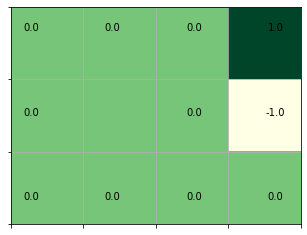

In [4]:
env.render()

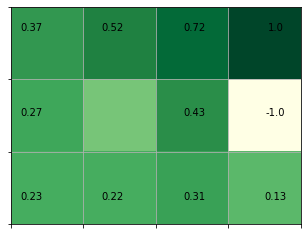

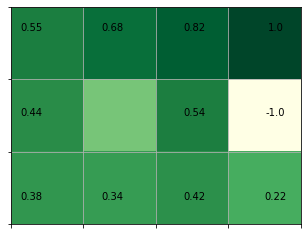

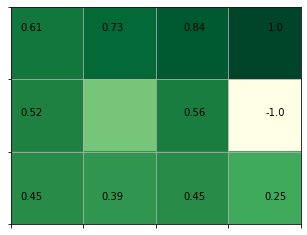

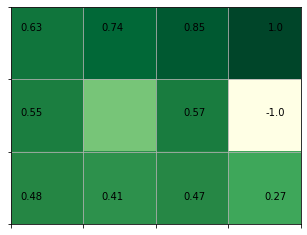

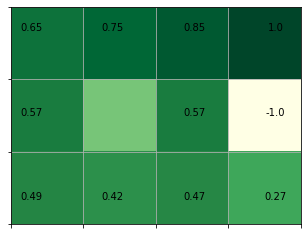

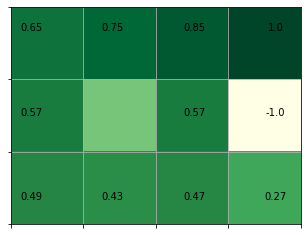

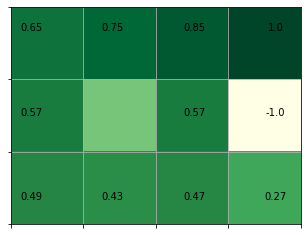

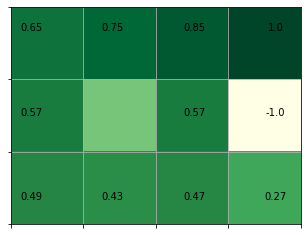

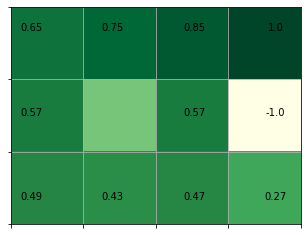

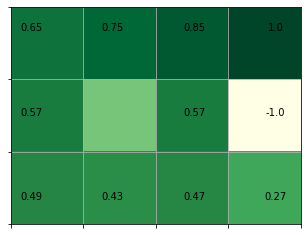

In [5]:
env.value_iteration(render=True)